# Classwork 7 - Τυχαίο Δάσος

Σήμερα θα δούμε στην πράξη πως λειτουργούν τα τυχαία δάση.


Περισσότερα:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# 1. Βασική ροή εργασιών με τα σπίτια στην Καλιφόρνια.  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, train_test_split

In [5]:
from sklearn.datasets import fetch_california_housing
california_set = fetch_california_housing()

In [6]:
# φτιάχνουμε το dataframe 
california_df = pd.DataFrame(california_set.data, columns=california_set.feature_names)

# προσθέτουμε την τιμή των σπιτιών
california_df['PRICE'] = pd.Series(california_set.target)  

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#δουλέυουμε με τα missing values 
california_df.isnull().sum() 


missing_values = ["n/a", "na", "--", 999,9999]   

# αλλάζουμε τις τιμές στο υπάρχον dataframe, γιαυτό βάζουμε inplace = True
california_df.replace(to_replace = missing_values, value = np.nan, inplace = True) 
# πετάμε τα NaNs 
california_df.dropna(inplace=True) 
# Reindex το dataframe. Αφού πετάξουμε τα missing values, το index δεν ταιριάζει πλέον γιατί λείπουν γραμμές
california_df.reset_index(drop=True, inplace=True)  

## 1.2 Train - test split

### Προτετοιμασία δεδομένων


In [8]:
#split
california_train, california_test = train_test_split(california_df, random_state=42)

In [9]:
# Βάζουμε όλα τα features στο X_train και βγάζουμε το PRICE γιατί είναι το target
X_train = california_train.drop(columns='PRICE')
# Το target 'price' στο y_train
y_train = california_train['PRICE']

# Βάζουμε όλα τα features στο X_train και βγάζουμε το PRICE γιατί είναι το target
X_test = california_test.drop(columns = 'PRICE')
# Το target 'price' στο y_train
y_test = california_test['PRICE']

## 1.3 Επανάληψη  Δέντρο αποφάσεων

In [10]:
# εισάγουμε το decision tree
dec_tree = DecisionTreeRegressor()
# εκπαίδευση DecisionTreeRegressor
dec_tree.fit(X_train, y_train)     
# υπολογισμός των predictions του TEST data-set 
y_pred_test_dec_tree = dec_tree.predict(X_test) 
# υπολογισμός των λαθών
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_dec_tree)) 

r2 = round(dec_tree.score(X_test, y_test), 2)  

print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse)) 

R2 score is 0.64
RMSE is 0.6920107990502411


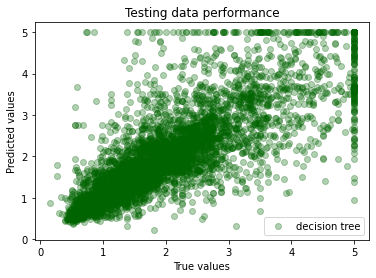

In [11]:
# scatter plot
s1 = plt.scatter(y_test, y_pred_test_dec_tree, color='darkgreen',
                 marker='o', alpha = 0.3, label = 'decision tree')
# labels
plt.xlabel('True values')
plt.ylabel('Predicted values')
# title
plt.title('Testing data performance')
# legend με τα labels 
plt.legend()
# τελικό plot
plt.show()

## 1.4 Τυχαίο Δάσος (Random forest)

Η διαδικασία είναι η ίδια το μόνο που αλλάζει πρακτικά είναι ότι πρέπει να αντικαταστήσουμε το DecisionTreeRegressor() με το RandomForestRegressor(). 
Φυσικά όπως και με τα δέντρα αποφάσεων πρέπει να σκεφτούμε και τις παραμέτρους που βελτιώνουν την πρόβλεψη. 


In [12]:
# εισάγουμε το Random forest
rf_regr = RandomForestRegressor(n_estimators=100) # n_estimators is the first important hyperparameter it is the number of trees in the forest, the more trees the better, but slows down the computation
# Fitting των δέντρων
rf_regr.fit(X_train, y_train)
# Predicting στα testing data
y_pred_test = rf_regr.predict(X_test)
# υπολογισμός του root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test)) 
# υπολογισμός του r squared
r2 = round(rf_regr.score(X_test, y_test), 2)  

print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse)) 

R2 score is 0.82
RMSE is 0.49470555728748755


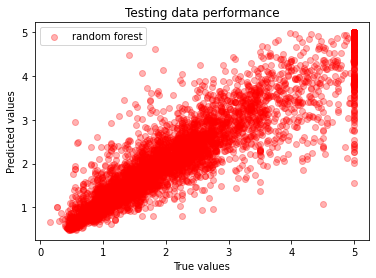

In [13]:
# scatter plot
#s1 = plt.scatter(y_test, y_pred_test_dec_tree,color='darkblue', marker='o', alpha = 0.3, label = 'decision tree')
s2 = plt.scatter(y_test, y_pred_test, color='red', 
                 marker='o', alpha = 0.3, label = 'random forest')
# labels
plt.xlabel('True values')
plt.ylabel('Predicted values')
# title
plt.title('Testing data performance')
# legend 
plt.legend()
# final plot
plt.show()

Κάντε comment/uncomment τα Scatterplots (s1 & s2) για να συγκρίνετε το Decision tree και το Random Forest. 
Παρατηρούμε ότι οι προβλεπόμενες τιμές τυπώνονται σε σχέση με τις πραγματικές.
Όσο λιγότερος θόρυβος στο data cloud, τόσο καλύτερα τα predictions. 
Μια ίσια γραμμή θα ανταποκρινόταν στην τέλεια πρόβλεψη. 

#### Περίληψη 

Βλέπουμε ότι το τυχαίο δάσος αποδίδει καλύτερα από ένα μεμονωμένο δέντρο. 

Ας προχωρήσουμε και να κάνουμε την ίδια σύγκριση μεταξύ Decision Trees  και Random forests σε ένα k-fold cross validation. 
Το πλεονέκτημα είναι ότι μπορούμε να αξιολογήσουμε την απόδοσή τους σε πολλούς διαφορετικούς διαχωρισμούς δεδομένων.

# 2. Ροή εργασιών με cross-validation 
## 2.1 Decision Trees


In [14]:
X = california_df.drop(columns = 'PRICE')
y = california_df['PRICE']
r2_scores = []
ls_true_values = []
ls_predicted_values = []
# Cross-Validation (cv)
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
# Λούπα στα splits 
for i_train, i_test in our_cv.split(X):
    # training και test set σύμφωνα με το τρέχον split
    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # decision tree
    dec_tree = DecisionTreeRegressor()
    # Fitting 
    dec_tree.fit(X_train, y_train)
    # Predicting 
    y_pred_test = dec_tree.predict(X_test)
    # R2 score
    r2 = round(dec_tree.score(X_test, y_test), 2)
    # Append score στην άδεια λίστα που ορίσαμε επάνω R2 scores
    r2_scores.append(r2)
    ls_true_values.append(y_test)
    ls_predicted_values.append(y_pred_test)

Mean of r2 scores: 0.61 
Standard deviation of r2 scores: 0.02


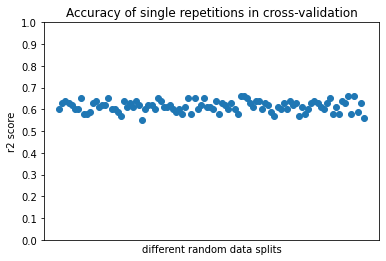

In [15]:
# Plot 1
#mean και standard deviation
mean_r2 = round(np.mean(r2_scores),2)
std_r2 = round(np.std(r2_scores),2)
print('Mean of r2 scores: {} \nStandard deviation of r2 scores: {}'
      .format(mean_r2, std_r2))
# Οπτικοποίηση ακρίβειας των διαφορετικών τυχαίων διαιρέσεων
plt.plot(r2_scores, marker='o', linestyle='None')
plt.xticks([])
plt.yticks(np.arange(0,1.1,0.1))
plt.title('Accuracy of single repetitions in cross-validation')
plt.xlabel('different random data splits')
plt.ylabel('r2 score')
plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


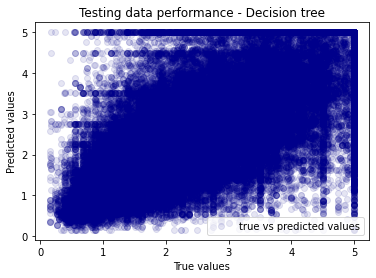

In [16]:
# Plot 2
# Concatenate data για το plotting
ls_predicted_values = np.concatenate(ls_predicted_values)
ls_true_values = np.concatenate(ls_true_values)
# scatter plot
s1 = plt.scatter(ls_predicted_values, ls_true_values, color='darkblue', marker='o', alpha = 0.1, label = 'true vs predicted values')
# labels
plt.xlabel('True values')
plt.ylabel('Predicted values')
# title
plt.title('Testing data performance - Decision tree')
# legend 
plt.legend()
# final plot
plt.show()

## 2.2 Random Forest 



In [17]:
# Θα εκπαιδεύσουμε 100 RandomForests το καθένα από 100 trees οπότε 10000 trees στο σύνολο, οπότε διαρκεί παραπάνω
X = california_df.drop(columns = 'PRICE')
y = california_df['PRICE']
r2_scores = []
ls_true_values = [] # άδειες λίστες στις οποίες θα προστεθούν τιμές στην συνέχεια
ls_predicted_values = []
# Cross-Validation (cv)
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)

for i_train, i_test in our_cv.split(X):

    X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # decision tree
    rf_regr = RandomForestRegressor(n_estimators=100)
    # Fitting 
    rf_regr.fit(X_train, y_train)
    # Predicting 
    y_pred_test = rf_regr.predict(X_test)
    # R2 score
    r2 = round(rf_regr.score(X_test, y_test), 2)
    # Append score 
    r2_scores.append(r2) # εδώ προσθέτονται οι τιμές για τις λίστες που υπάρχουν επάνω
    ls_true_values.append(y_test)
    ls_predicted_values.append(y_pred_test)

KeyboardInterrupt: ignored

In [ ]:
# Plot 1
#Calculating mean και standard deviation
mean_r2 = round(np.mean(r2_scores),2)
std_r2 = round(np.std(r2_scores),2)
print('Mean of r2 scores: {} \nStandard deviation of r2 scores: {}'
      .format(mean_r2, std_r2))
# Οπτικοποίηση ακρίβειας των διαφορετικών τυχαίων διαιρέσεων
plt.plot(r2_scores, marker='o', linestyle='None')
plt.xticks([])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Accuracy of single repetitions in cross-validation')
plt.xlabel('different random data splits')
plt.ylabel('r2 score')
plt.show()

In [ ]:
# Plot 2
# Concatenate data για το plotting
ls_predicted_values = np.concatenate(ls_predicted_values)
ls_true_values = np.concatenate(ls_true_values)
# scatter plot
s1 = plt.scatter(ls_predicted_values, ls_true_values, color='darkblue', 
                 marker='o', alpha = 0.1, label = 'true vs predicted values')
# labels
plt.xlabel('True values')
plt.ylabel('Predicted values')
# title
plt.title('Testing data performance - Random forest')
# legend 
plt.legend()
# final plot
plt.show()

Αυτό είναι αξιοθαύμαστο! Η μέθοδος RandomForest πέτυχε πολύ υψηλότερη μέση ακρίβεια πρόβλεψης (που μετριέται σε R²) και επίσης μια χαμηλότερη μεταβλητότητα και ως εκ τούτου, τα αποτελέσματα είναι σταθερότερα.

## 2.3 Βελτιστοποίηση τυχαίου δάσους - ας δούμε πόσο μακριά μπορούμε να το φτάσουμε

Μπορεί να πάρει λίγο χρόνο για τον υπολογισμό, ανάλογα με τα διαφορετικά βάθη 

In [ ]:
# Πάμε να βελτιστοποιήσουμε ορισμένες παραμέτρους
X = california_df.drop(columns = 'PRICE')
y = california_df['PRICE']
# άδειες λίστες
ls_total_r2_test = []
ls_total_r2_train = []
# λίστα για βάθος
ls_max_depth = []
# Λούπα στα βάθη των δέντρων του RandomForest από το 1 μέχρι το 10, τα βάθη μπορείτε να τα αλλάξετε
for current_max_depth in np.arange(10): 
    # ξεκινάει το επαναλαμβανόμενο cross validation (cv) 
    our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
    #  RandomForests regressor και ορίζουμε το max depth του κάθε single tree
    rf_regr = RandomForestRegressor(max_depth=current_max_depth+1, n_estimators=100)
    # άδεια λίστα των single cv loop results
    ls_r2_test = []
    ls_r2_train = []
    # Λούπα του cross validation
    for i_train, i_test in our_cv.split(X):
        # 1. Split data 
        X_train, X_test, y_train, y_test = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
        # 2. Train DT regressor 
        rf_regr.fit(X_train, y_train)
        # 3. Test regressor με τα test data
        y_pred_test = rf_regr.predict(X_test)
        y_pred_train = rf_regr.predict(X_train)
        # 4. υπολογισμός λαθών
        current_r2_test = r2_score(y_test, y_pred_test)
        current_r2_train = r2_score(y_train, y_pred_train)
        # 5. Append 
        ls_r2_test.append(current_r2_test)
        ls_r2_train.append(current_r2_train)
        #τέλος: πρέπει να υπάρχουν 100 τιμές - 10 subsets *10 repeats
    # 6. append max depth
    ls_max_depth.append(current_max_depth+1)
    # append mean of 100 r2 στη λίστα
    ls_total_r2_test.append(np.mean(ls_r2_test))  
    ls_total_r2_train.append(np.mean(ls_r2_train))  
# οπτικοποίηση του R2 ανά βάθος
plt.plot(ls_max_depth, ls_total_r2_train, label="Training data")
plt.plot(ls_max_depth, ls_total_r2_test, label="Testing data")
plt.xticks(np.arange(10)+1)
plt.xlabel('tree depth')
plt.ylabel('R²')
plt.legend()
plt.show()
# best depth
print('Best performance: {}\nBest depth: {}'.format(max(ls_total_r2_test), np.argmax(ls_total_r2_test)+1))

Τώρα που γνωρίζουμε το βέλτιστο βάθος πάμε πίσω στο κεφάλαιο 2.2 RandomForest και εισάγουμε αυτήν την υπερ-παράμετρο (hyper-parameter).
Προσθέστε το ως παράμετρο όταν δημιουργείτε το Random Forest στη λούπα του cross-validation.

## 2.4 Συμπέρασμα

Τα αποτελέσματα δείχνουν, ότι τόσο στο train-test split καθώς και στη ροή εργασίας του cross-validation, η μέθοδος Random Forest παρουσιάζει βελτιωμένη απόδοση σε σχέση με τα μεμονωμένα δέντρα αποφάσεων όσον αφορά την πρόβλεψη. Εμφανίζει σταθερά υψηλότερες τιμές R². 

Μια άλλη ενδιαφέρουσα πτυχή είναι η απόδοση των Random Forests στα διαφορετικά βάθη δέντρων. Τα δέντρα απόφασεων μειώνονται στην απόδοση εάν η πολυπλοκότητά τους (βάθος δέντρων) είναι πάρα πολύ υψηλή, δεδομένου ότι υπερταιριάζουν (κάνουν overfit) τα στοιχεία εκπαίδευσης. Αντίθετα, τα RandomForests είναι σε θέση να αντιμετωπίζουν πιο ήπια αυτό το πρόβλημα μέσω του μέσου όρου των πολλών δέντρων που υπολογίζουν, ακόμη και όταν τα δέντρα έχουν υψηλό βάθος. Σε αυτό το παράδειγμα, το υψηλότερο βάθος δεν μειώνει υπερβολικά τις επιδόσεις. Ωστόσο, αυτό ΔΕΝ σημαίνει ότι η μέθοδος RandomForest δεν επηρεάζεται από το overfitting, είναι απλά πιο ανθεκτική σε αυτό το πρόβλημα. Σε επόμενα παραδείγματα θα είναι απαραίτητο να ορίζετε τις υπερπαραμέτρους του RandomForest, π.χ. το βάθος του μεμονωμένου δέντρου.

Ένα σημαντικό μειονέκτημα που έχουν τα RandomForests είναι οι υπολογιστικές δαπάνες τους. Η πρόβλεψη σε μεγάλα σύνολα δεδομένων, συμπεριλαμβανομένης της βελτιστοποίησης των υπερπαραμέτρων, μπορεί να διαρκέσει μέρες.

## Συγχαρητήρια που έφτασες ως εδώ!

Τώρα που είστε εξοπλισμένοι με νέα εργαλεία, θα δουλέψετε με το έτοιμο σύνολο δεδομένων diabetes 
για να δείτε μέχρι που μπορείτε να φτάσετε!


# 3. Homework 7

Προβλέψτε την εξέλιξη του διαβήτη χρησιμοποιώντας Random Forests σε μια ροή εργασιών με cross-validation.

In [ ]:
# Diabetes data set - Συγκρίνετε την πρόβλεψη ενός δέντρου αποφάσεων και ενός τυχαίου δάσους με χρήση cross validation
from sklearn import datasets 
diabetes_set = datasets.load_diabetes()

In [ ]:
# Οργανώστε τα δεδομένα

In [ ]:
# Καθαρίστε τα

In [ ]:
# Εκπαιδεύστε ένα decision tree και μετά ένα random forest σε μια ροή εργασιών με cross-validation.

In [ ]:
# Γράψτε μια παράγραφο με τα συμπεράσματά σας